<a href="https://colab.research.google.com/github/sonam2603/Capstone-project-1/blob/main/play_store1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Play Store App Review Analysis

###**Contribution** - Individual

#**Project Summary -**

### As we all know, Google play store is the most widely used app store for android versions, with million of apps available for download. The primary goal of this project is to analyze data from the Google Play Store, exploring various aspects such as app categories, user reviews, ratings, sizes, and pricing.

### Explore and analyze the data to discover results and statistics for different apps in Google play store.

# **GitHub Link -**

##

# **Let's Begin !**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df_review = pd.read_csv('/content/drive/MyDrive/alma/User Reviews.csv')
df_playstore = pd.read_csv('/content/drive/MyDrive/alma/Play Store Data.csv')

In [ ]:
df_review

In [ ]:
df_review.info()

In [ ]:
df_playstore

In [ ]:
df_playstore.columns

## **data cleaning**

In [ ]:
df_playstore.info()

In [ ]:
#checking for null values
df_playstore.isnull()

In [ ]:
#checking for null values in every column
df_playstore.isnull().sum()

In [ ]:
# Checking how many outliers are present
df_playstore[df_playstore.Rating>5]

In [ ]:
# Checking how many outliers are present by using boxplot
df_playstore.boxplot(column='Rating')

In [ ]:
# Cross checking again for the same
sns.histplot(df_playstore['Rating'],kde=True,bins=30)

In [ ]:
# Dropping the Outlier we found
df_playstore.drop([10472], inplace=True)

In [ ]:
# Checking if the dropped outlier has been dropped successfully
df_playstore[10470:10475]

In [ ]:
# Reconfirming to check for any other outlier
df_playstore.boxplot(column='Rating')

In [ ]:
# Cross checking again for the same
sns.histplot(df_playstore['Rating'],kde=True,bins=30)

In [ ]:
# Replacing the missing values in 'Rating' with the mode value of that entire column since there are 1474 null values
modeValueRating = df_playstore['Rating'].mean()
df_playstore['Rating'].fillna(value = modeValueRating, inplace = True)

In [ ]:
# Finding the null values in column "Type"
df_playstore[df_playstore.Type.isnull()]

In [ ]:
# Filling the missing value with 'Free' as the price is 0.0
df_playstore['Type'].fillna("Free", inplace = True)
df_playstore.iloc[9148]

In [ ]:
# Checking again for null values in the Dataset
df_playstore.isnull().sum()

In [ ]:
df_playstore

In [ ]:
# Dropping columns irrelevant to analysis
df_playstore.drop(['Current Ver', 'Android Ver'], axis=1, inplace= True)

In [ ]:
df_playstore.isnull().sum()

## Rating

In [ ]:
df_playstore['Rating'].unique()

array([4.1       , 3.9       , 4.7       , 4.5       , 4.3       ,
       4.4       , 3.8       , 4.2       , 4.6       , 3.2       ,
       4.        , 4.19175742, 4.8       , 4.9       , 3.6       ,
       3.7       , 3.3       , 3.4       , 3.5       , 3.1       ,
       5.        , 2.6       , 3.        , 1.9       , 2.5       ,
       2.8       , 2.7       , 1.        , 2.9       , 2.3       ,
       2.2       , 1.7       , 2.        , 1.8       , 2.4       ,
       1.6       , 2.1       , 1.4       , 1.5       , 1.2       ])

In [ ]:
df_playstore['Rating'].dtypes

dtype('float64')

## Review

In [ ]:
df_playstore.Reviews.unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

Data type of Review is object. If we convert from string to numeric, we can make easy.



In [ ]:
df_playstore.Reviews = df_playstore.Reviews.astype(int)

In [ ]:
df_playstore.Reviews.dtypes

dtype('int64')

## Size

In [ ]:
df_playstore['Size'].unique()

Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan. After, I dropped 'M' and 'k'. Finally, I converted float value.

In [ ]:
df_playstore.Size = df_playstore.Size.replace('Varies with device',np.nan)
# All size values became the kilobyte type.
df_playstore['Size'] = df_playstore.Size.str.replace("M","000")
df_playstore['Size'] = df_playstore['Size'].str.replace('k','')
df_playstore.Size = df_playstore.Size.astype(float)
df_playstore.Size.dtype

dtype('float64')

In [ ]:
df_playstore['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

## Installs

In [ ]:
df_playstore.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Data type of Size is object. I'm gonna make similar processes, which I made the in 'Size'.

In [ ]:
df_playstore['Installs'] = df_playstore['Installs'].astype(str)

# Remove commas and plus signs, and convert to float
df_playstore['Installs'] = df_playstore['Installs'].str.replace(',', '')
df_playstore['Installs'] = df_playstore['Installs'].str.replace('+', '')
df_playstore['Installs'] = df_playstore['Installs'].astype(float)

# Verify th
df_playstore['Installs'].dtype

<ipython-input-31-337a99e7d6fb>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_playstore['Installs'] = df_playstore['Installs'].str.replace('+', '')


dtype('float64')

## Price

In [ ]:
df_playstore.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
df_playstore['Price'] = df_playstore['Price'].astype(str)
df_playstore.Price = df_playstore.Price.str.replace("$","").astype(float)
df_playstore.Price.dtype

<ipython-input-33-1d4ec18f231f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_playstore.Price = df_playstore.Price.str.replace("$","").astype(float)


dtype('float64')

## last updates


In [ ]:
df_playstore['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

Data type of Last Uptated is object. I converted from string to date type.

In [ ]:
df_playstore['Last Updated'] = pd.to_datetime(df_playstore['Last Updated'])
df_playstore['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

## **Exploratory Data Analysis**

After, I prepared to analyze our data, somewhat let's explore the datas. :)

corr() : It returns correlation.

describe (): It returns number of entries, average of entries, outlier values, standart deviation, minimum and maximum entry.

In [ ]:
df_playstore.corr()

In [ ]:
df_playstore.describe()

In [ ]:
#correlation map
sns.heatmap(df_playstore.corr(),annot = True,linewidth = .5)
plt.show()

### **total no. of apps in each category**

In [ ]:
category = df_playstore.Category.value_counts()
category

In [ ]:
plt.figure(figsize=(15,10))
category.plot.bar()

### **content rating**

In [ ]:
content= df_playstore['Content Rating'].value_counts()
content

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

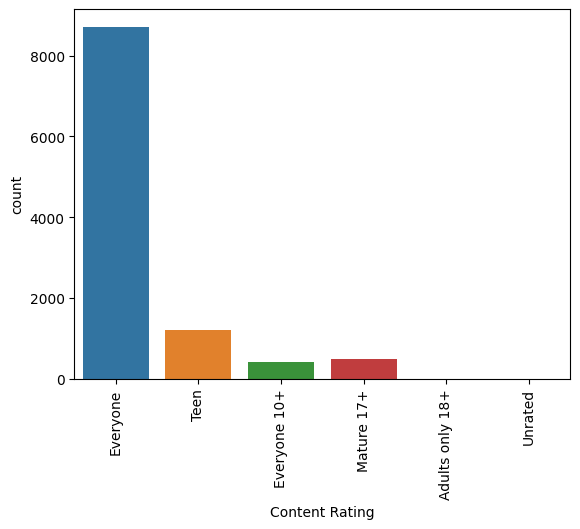

In [ ]:
sns.countplot(x=df_playstore['Content Rating'])
plt.xticks(rotation=90)
plt.show()

###**Average review across each category**

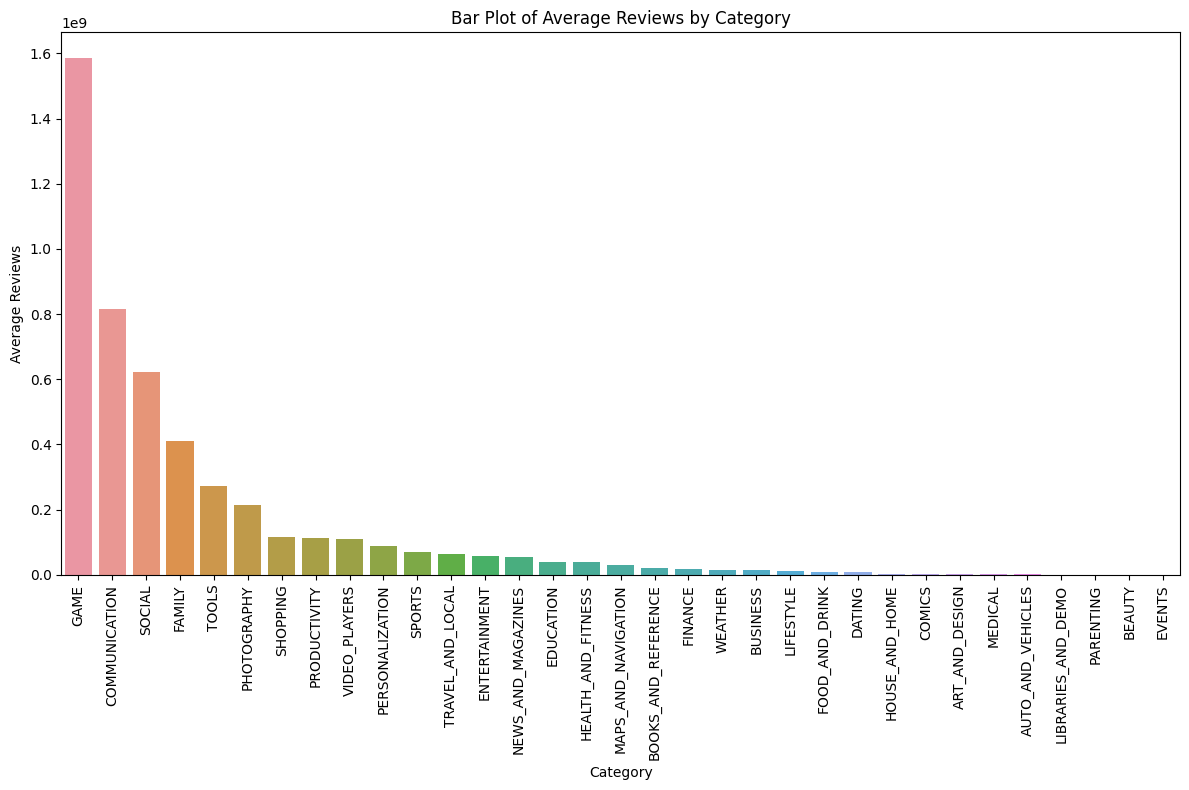

In [ ]:
# Calculate the average or total reviews by category
reviews_by_category = df_playstore.groupby('Category')['Reviews'].sum() # or sum() for total reviews

# Reset index to have Category as a column
reviews_by_category = reviews_by_category.reset_index()

# Sort the data by the reviews column
sorted_data = reviews_by_category.sort_values(by='Reviews', ascending=False)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Reviews', data=sorted_data,)
plt.xticks(rotation = 90)
plt.xlabel('Category')
plt.ylabel('Average Reviews')
plt.title('Bar Plot of Average Reviews by Category')
plt.tight_layout()
plt.show()

### **category and installs**

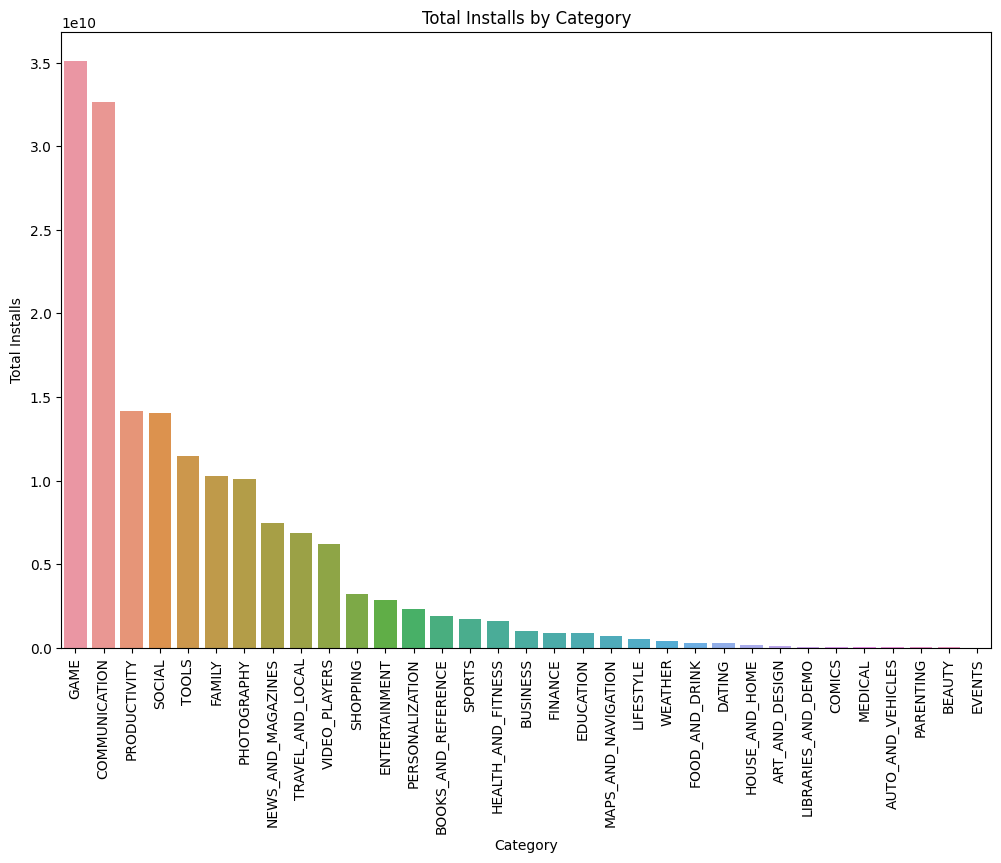

In [ ]:
# Aggregate the data by category and calculate the sum of installs
pivot_data = df_playstore.groupby('Category')['Installs'].sum().reset_index()

# Sort the data by the sum of installs
sorted_data = pivot_data.sort_values(by='Installs', ascending=False)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Installs', data=sorted_data)
plt.xlabel('Category')
plt.ylabel('Total Installs')
plt.title('Total Installs by Category')
plt.xticks(rotation=90)
plt.show()

## Free vs Paid

In [ ]:
app_type = df_playstore.Type.value_counts()

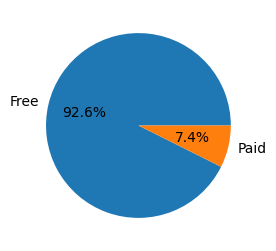

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(app_type,labels=app_type.index, autopct='%1.1f%%')
plt.show()

## **Most popular apps**

In [ ]:
# Sort the DataFrame by 'Installs' column in descending order
sorted_data = df_playstore.sort_values(by='Installs', ascending=False)

# Display the top N most popular apps (adjust N as needed)
top_n_apps = 10
most_popular_apps = sorted_data.head(top_n_apps)

# Display the result
most_popular_apps[['App', 'Category', 'Installs','Price','Reviews']]

,App,Category,Installs,Price,Reviews
3896,Subway Surfers,GAME,1.000000e+09,0.0,27711703
3943,Facebook,SOCIAL,1.000000e+09,0.0,78128208
335,Messenger – Text and Video Chat for Free,COMMUNICATION,1.000000e+09,0.0,56642847
3523,Google Drive,PRODUCTIVITY,1.000000e+09,0.0,2731211
3565,Google Drive,PRODUCTIVITY,1.000000e+09,0.0,2731211
2884,Google Photos,PHOTOGRAPHY,1.000000e+09,0.0,10859051
3665,YouTube,VIDEO_PLAYERS,1.000000e+09,0.0,25655305
2853,Google Photos,PHOTOGRAPHY,1.000000e+09,0.0,10858538
4234,Skype - free IM & video calls,COMMUNICATION,1.000000e+09,0.0,10484169
3687,Google Play Movies & TV,VIDEO_PLAYERS,1.000000e+09,0.0,906384


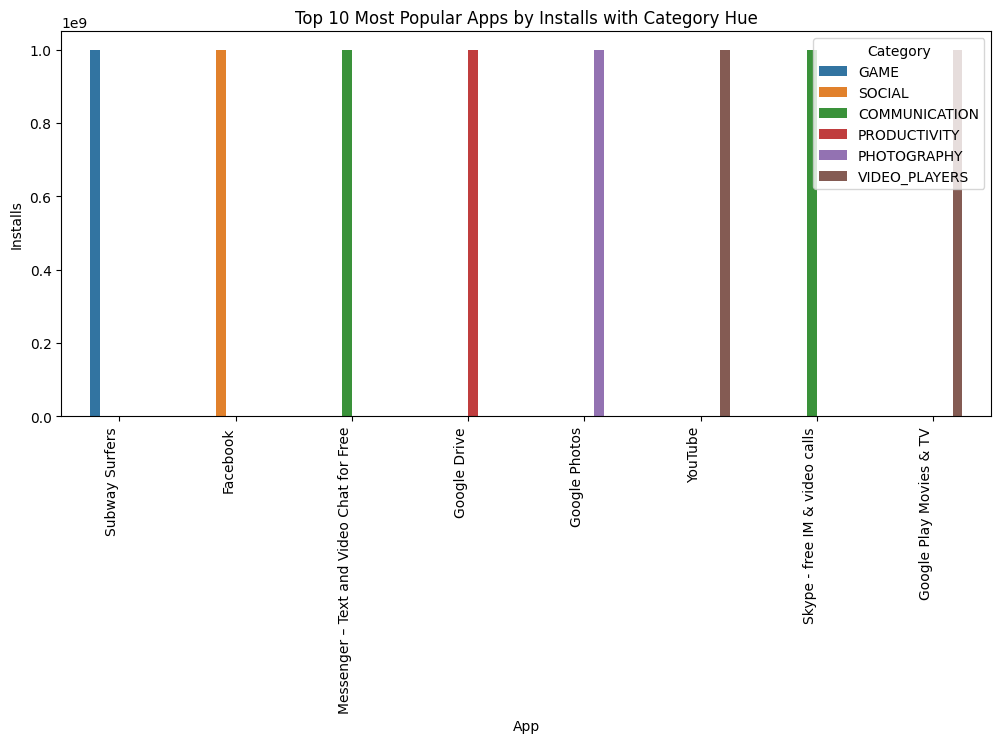

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x='App', y='Installs', data=most_popular_apps, hue='Category',width = .5)
plt.xticks(rotation=90, ha='right')
plt.title('Top 10 Most Popular Apps by Installs with Category Hue')
plt.show()


## **Most Popular App by Reviews**

In [ ]:
df_sorted = df_playstore.sort_values(by='Reviews',ascending = False)
most_popular=df_sorted.iloc[0]
most_popular

App                          Facebook
Category                       SOCIAL
Rating                            4.1
Reviews                      78158306
Size                              NaN
Installs                 1000000000.0
Type                             Free
Price                             0.0
Content Rating                   Teen
Genres                         Social
Last Updated      2018-08-03 00:00:00
Name: 2544, dtype: object

## **which category have the highest paid apps**

In [ ]:
# category where type of app is paid
df_paid = df_playstore[df_playstore['Type']=='Paid']

df_category = df_paid.groupby('Category')['App'].count()
df_sorted=df_category.sort_values(ascending=False)
df_sorted.head(1)

Category
FAMILY    191
Name: App, dtype: int64

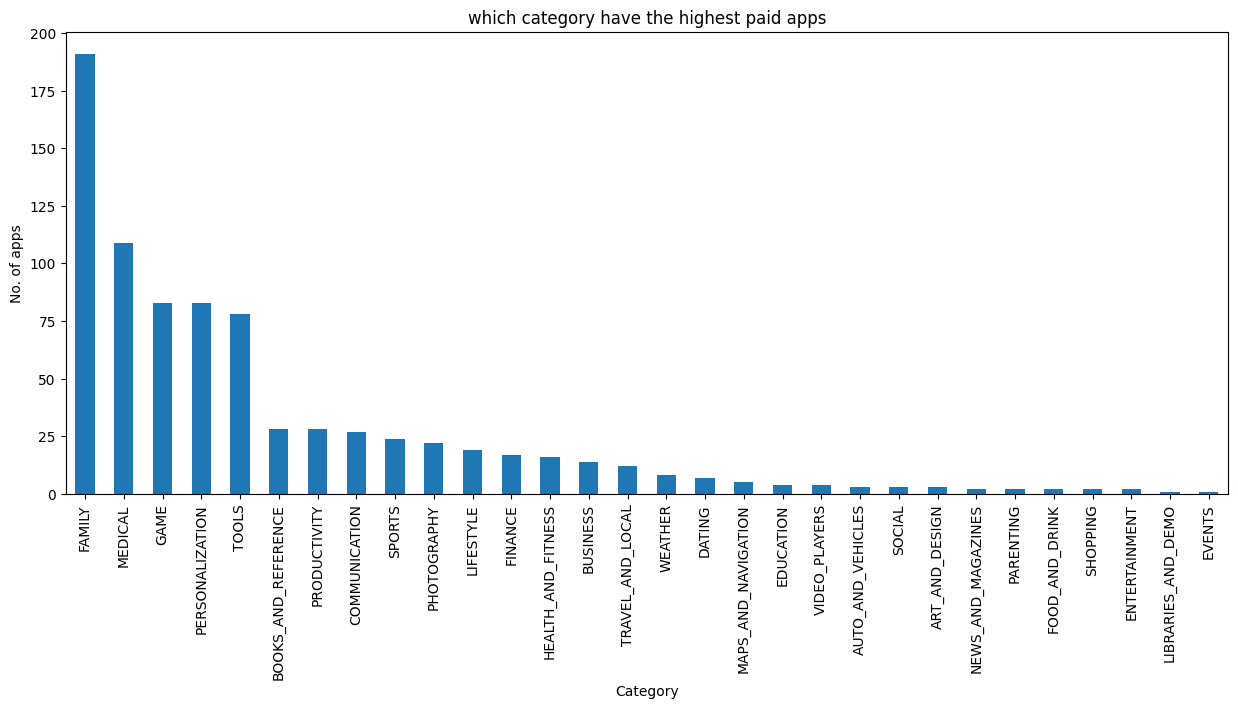

In [ ]:
plt.figure(figsize=(15,6))
df_sorted.plot.bar()
plt.xlabel('Category')
plt.ylabel('No. of apps')
plt.title('which category have the highest paid apps')
plt.show()

###**Distribution of app rating**

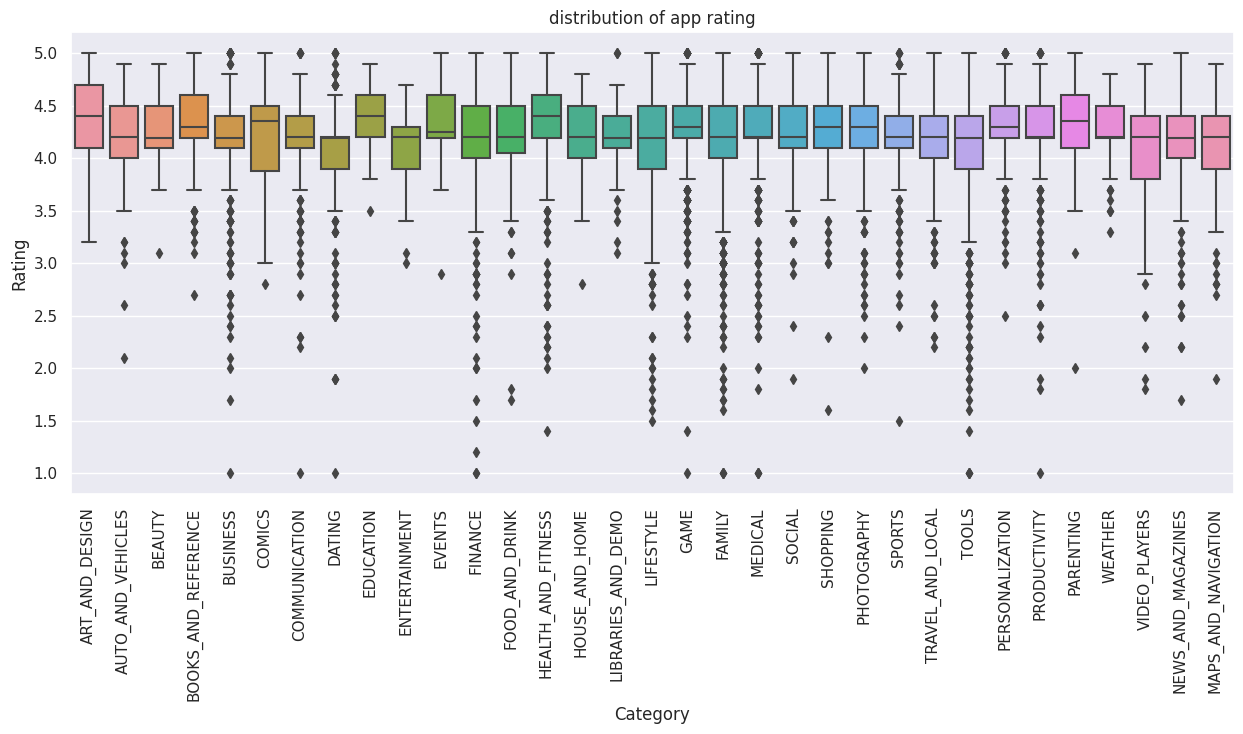

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.boxplot(x='Category', y='Rating',data=df_playstore)
plt.xticks(rotation = 90)
plt.title('distribution of app rating')
plt.show()

## **Review data**

In [ ]:
df_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
#checking for null values
df_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [ ]:
#drop null values
df_review.dropna()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [ ]:
sentiment = df_review.Sentiment.value_counts()

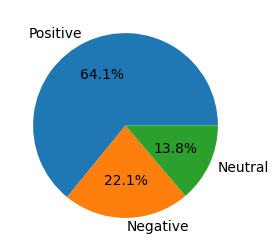

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(sentiment,labels = sentiment.index,autopct='%1.1f%%')
plt.show()

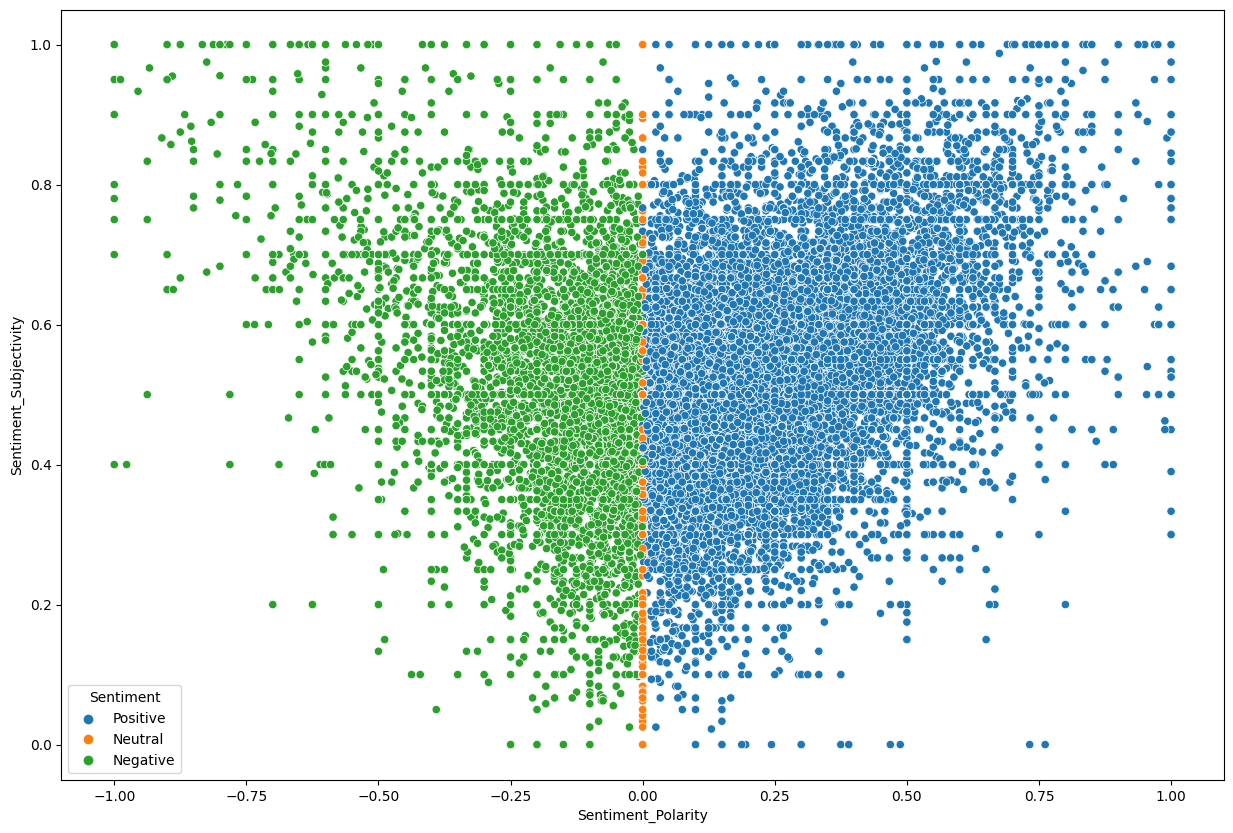

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Sentiment_Polarity',y='Sentiment_Subjectivity',hue='Sentiment',data=df_review)
plt.show()